In [173]:
import matplotlib.pyplot as plt
import numpy as np
import math
import IPython

%matplotlib notebook

# helpers

In [3]:
def plot(x, y):
    plt.figure()
    plt.plot(x, y)

# Generate a signal composed of several frequencies

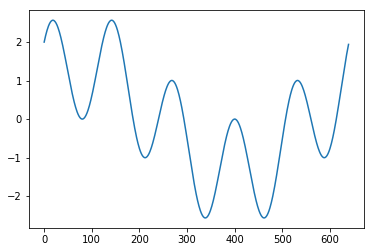

In [163]:
# list of frequencies that are combined

samples = 640
samples_per_second = 640

frequencies = map(lambda f: f * 2*math.pi/samples_per_second, [1, 5])

# generate signal
time = np.arange(0, samples, 1)
signal = np.zeros(len(time))
for f in frequencies:
    signal = np.add(signal, np.sin(f*time))
    signal = np.add(signal, np.cos(f*time))
    

plot(time, signal)

# Add noise

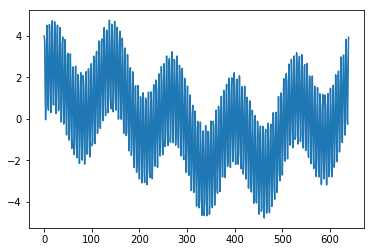

In [165]:
noise_frequency = 20
signal = np.add(signal, np.cos(noise_frequency * time))
signal = np.add(signal, np.sin(noise_frequency * time))
plot(time, signal)

# Fourier Transform

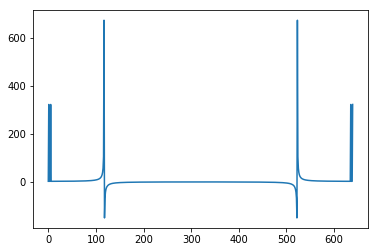

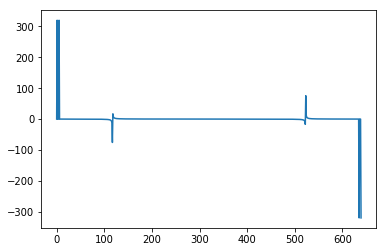

In [166]:
# compute W[k]
k = np.array(samples)
W_k = np.zeros([samples, samples])
W_k_j = np.zeros([samples, samples])
for k in range(samples):
    for n in range(samples):
        W_k[k][n] = np.cos(2*math.pi/samples * n * k)
        W_k_j[k][n] = np.sin(2*math.pi/samples * n * k)
        
        
# multiply the signal by this matrix
dft_real = np.dot(W_k, signal)
dft_img = np.dot(W_k_j, signal)
plot(time, dft_real)
plot(time, dft_img)

# Remove high frequency noise

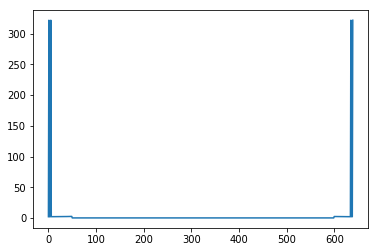

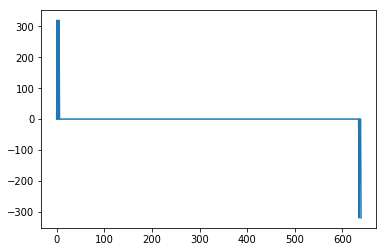

In [168]:
dft_real[50:600] = 0
plot(time, dft_real)

dft_img[50:600] = 0
plot(time, dft_img)

# Synthesize signal back

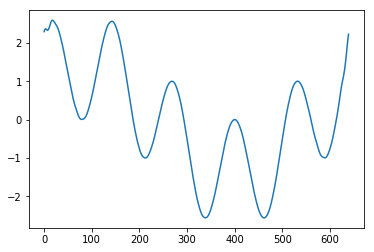

In [169]:
X_new = np.dot(dft_real, W_k) / samples
X_new_img = np.dot(dft_img, W_k_j) / samples

plot(time, np.add(X_new, X_new_img))

Just mono files


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


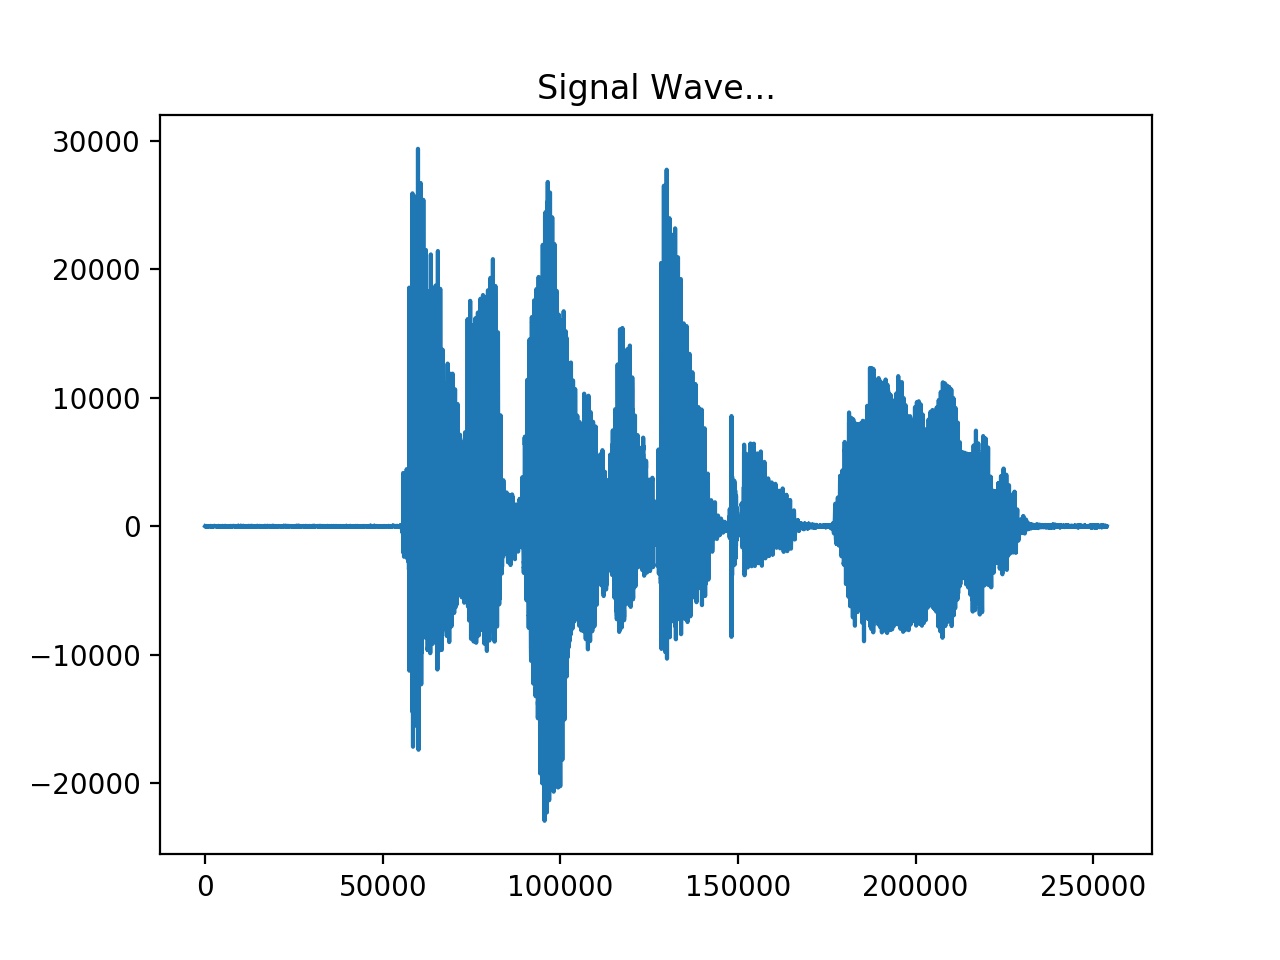

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('sample.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')


plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

In [177]:
IPython.display.Audio(signal, rate=44100)

In [178]:
np.fft(signal)

TypeError: 'module' object is not callable